In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
%matplotlib inline
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format

In [14]:
# Grab and process the raw data.
raw = pd.read_csv('fbi_data_2013.csv')
raw.columns = ['City','Population','Violent crime','Murder','Rape1','Rape2','Robbery','Aggravated Assault','Property Crime','Burglary','Larceny','Motor Vehicle Theft','Arson3']
raw.fillna(0, inplace=True)

In [26]:
# set variables to boolean
raw['pMurder'] = np.where(raw['Murder'] > 0, 1, 0)
raw['pRobbery'] = np.where(raw['Robbery'] > 0, 1, 0)
raw['sqPop'] = raw['Population'] ** 2

In [27]:
# Get just the data you want to work
sub = pd.DataFrame()
sub = raw[['City','Population','pMurder','pRobbery','sqPop','Property Crime']]

In [28]:
sub.describe()

,Population,pMurder,pRobbery,sqPop,Property Crime
count,348.000,348.000,348.000,348.000,348.000
mean,40037.632,0.141,0.601,203554650960.236,792.606
std,450037.368,0.348,0.490,3778875542708.129,7659.725
min,526.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,0.000,9018117.000,40.500
50%,7233.500,0.000,1.000,52325684.500,112.500
75%,18427.500,0.000,1.000,339753567.000,341.000
max,8396126.000,1.000,1.000,70494931807876.000,141971.000


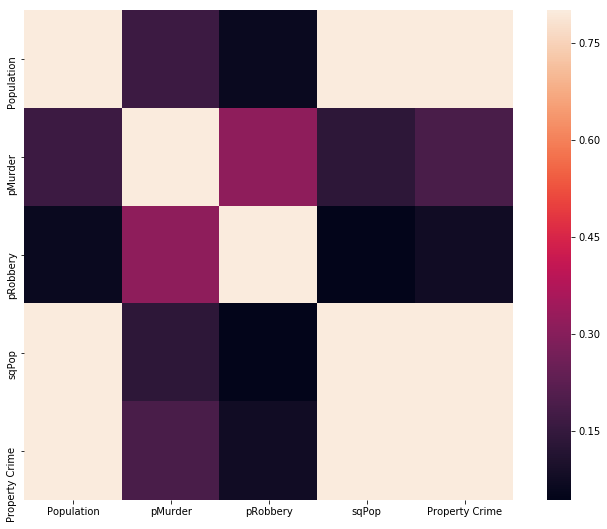

In [32]:
corrmat = sub.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

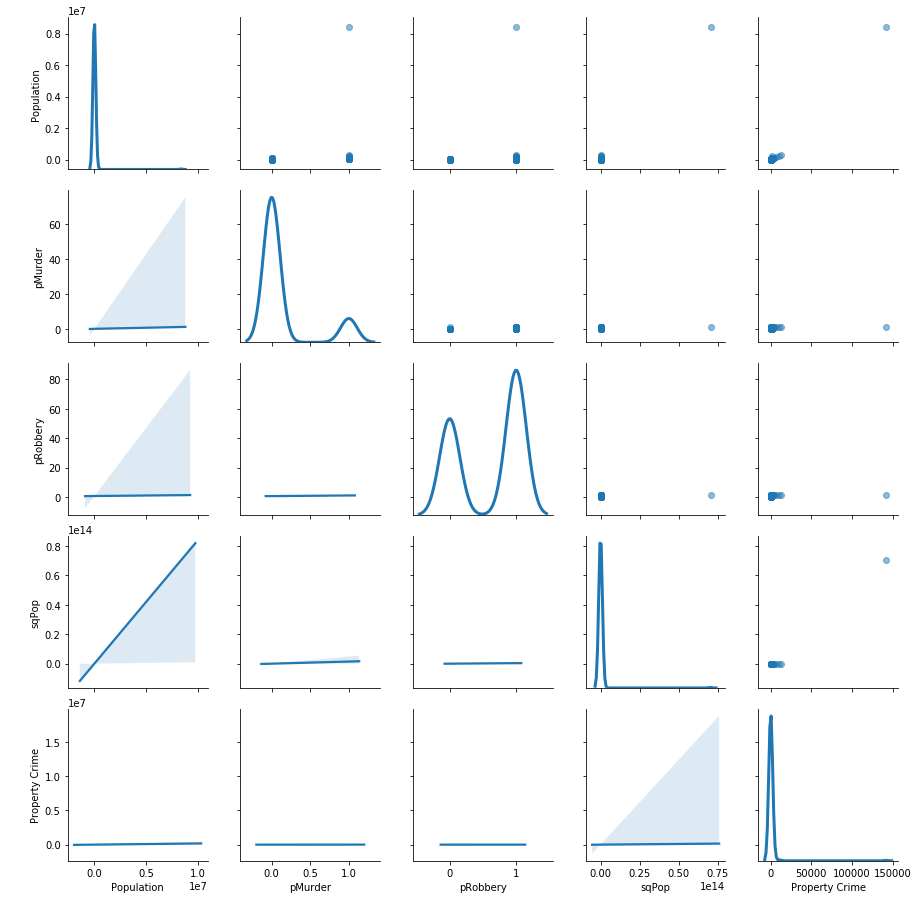

In [33]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(sub, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

(array([0]), <a list of 1 Text xticklabel objects>)

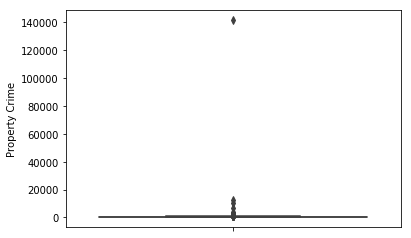

In [38]:
sns.boxplot(data=sub, y='Property Crime')
plt.xticks(rotation=90)

In [40]:
# Review everything without New York City - may need to stratify to avoid too much bias toward NY
sub_no_ny = pd.DataFrame()
sub_no_ny = sub[sub['City'] != "New York"]

(array([0]), <a list of 1 Text xticklabel objects>)

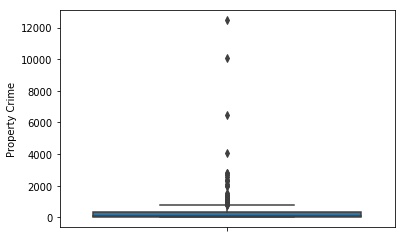

In [44]:
sns.boxplot(data=sub_no_ny, y='Property Crime')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

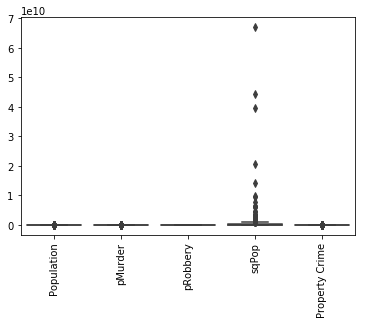

In [45]:
sns.boxplot(data=sub_no_ny)
plt.xticks(rotation=90)

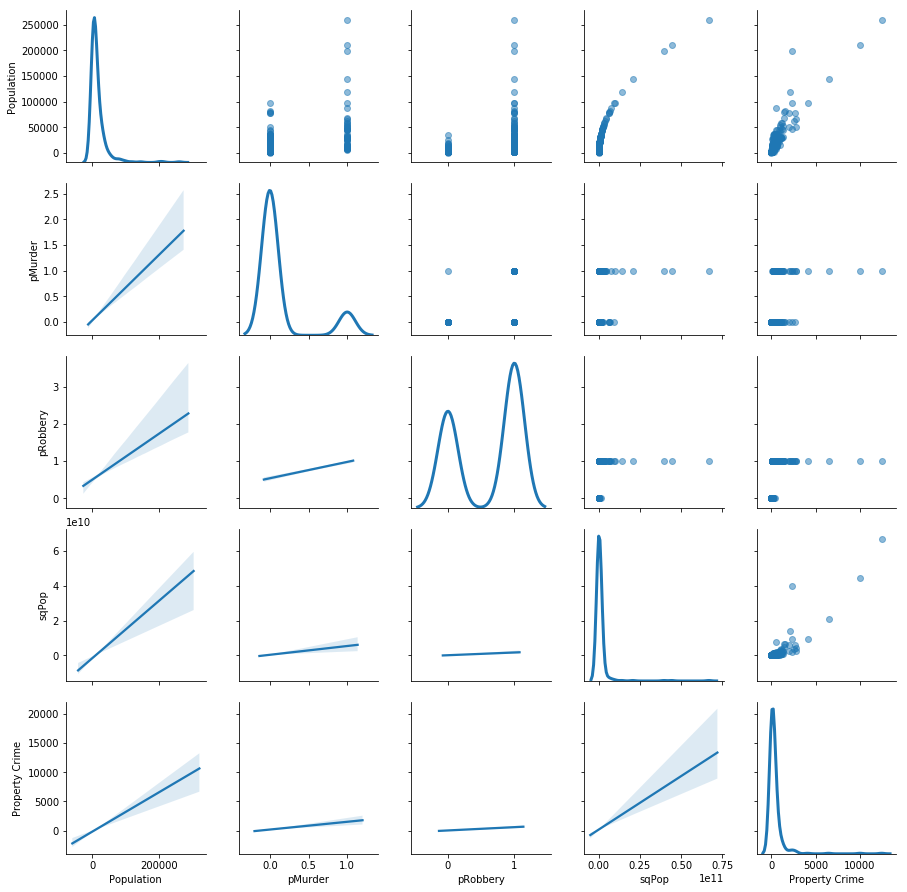

In [46]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(sub_no_ny, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.